In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder 
le=LabelEncoder()
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("h1n1_vaccine_prediction.csv")

In [6]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [7]:
data.shape

(26707, 34)

In [8]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<AxesSubplot:xlabel='sex', ylabel='count'>

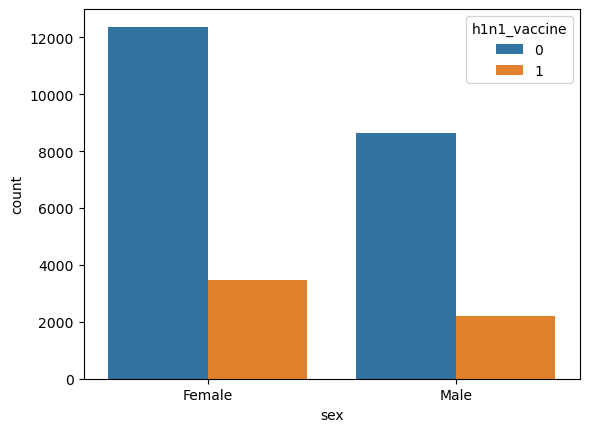

In [9]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=data)

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

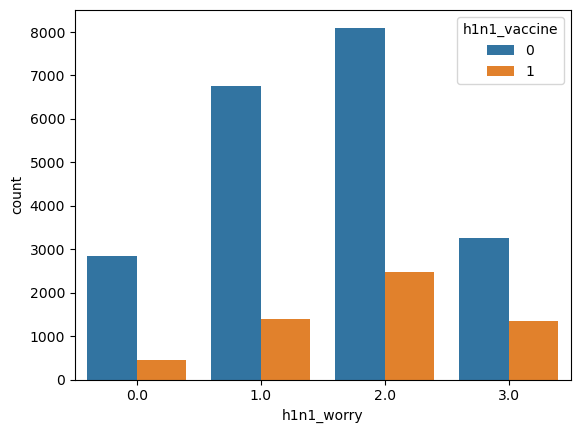

In [10]:
sns.countplot(x="h1n1_worry",hue="h1n1_vaccine",data=data)

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

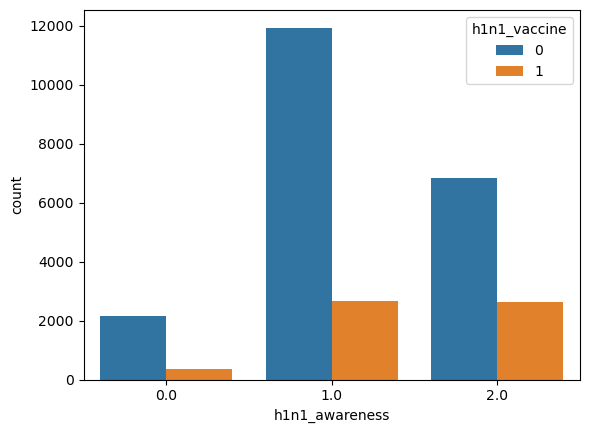

In [11]:
sns.countplot(x="h1n1_awareness",hue="h1n1_vaccine",data=data)

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

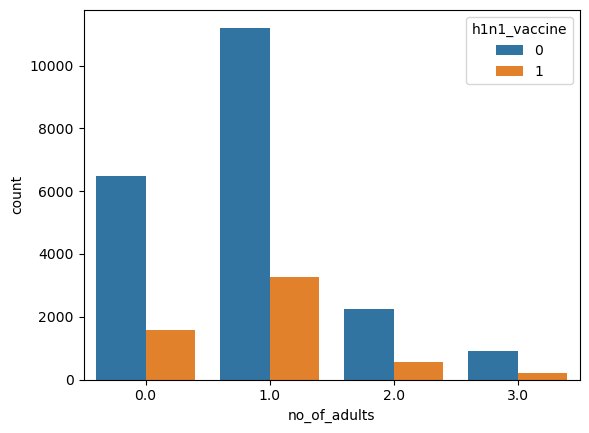

In [12]:
sns.countplot(x="no_of_adults",hue="h1n1_vaccine",data=data)

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

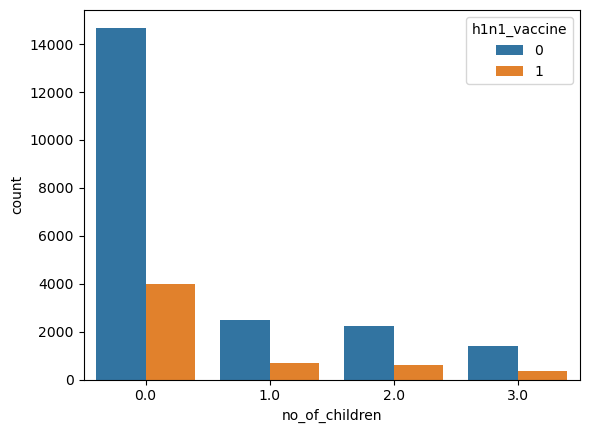

In [13]:
sns.countplot(x="no_of_children",hue="h1n1_vaccine",data=data)

<AxesSubplot:xlabel='is_h1n1_vacc_effective', ylabel='count'>

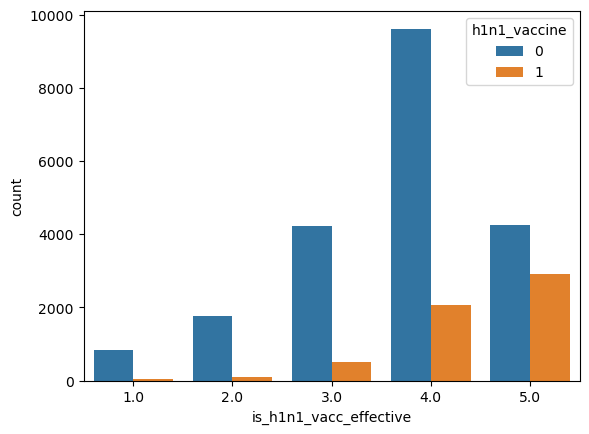

In [14]:
sns.countplot(x="is_h1n1_vacc_effective",hue="h1n1_vaccine",data=data)

<AxesSubplot:xlabel='is_h1n1_risky', ylabel='count'>

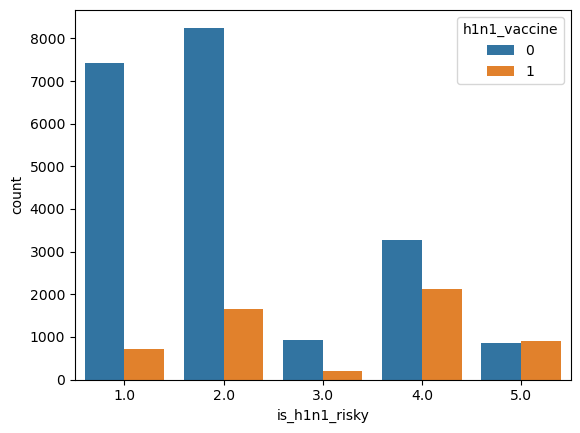

In [15]:
sns.countplot(x="is_h1n1_risky",hue="h1n1_vaccine",data=data)

<AxesSubplot:xlabel='sick_from_h1n1_vacc', ylabel='count'>

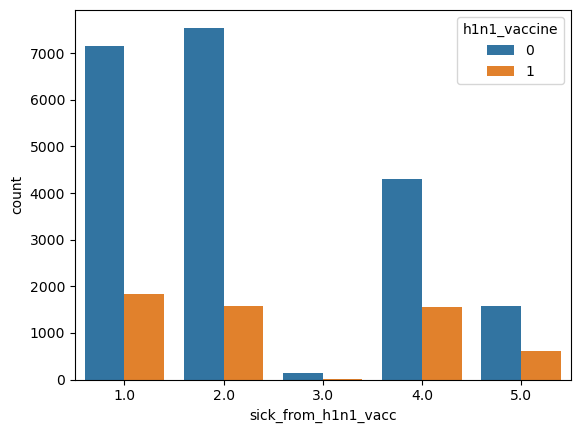

In [16]:
sns.countplot(x="sick_from_h1n1_vacc",hue="h1n1_vaccine",data=data)

<AxesSubplot:>

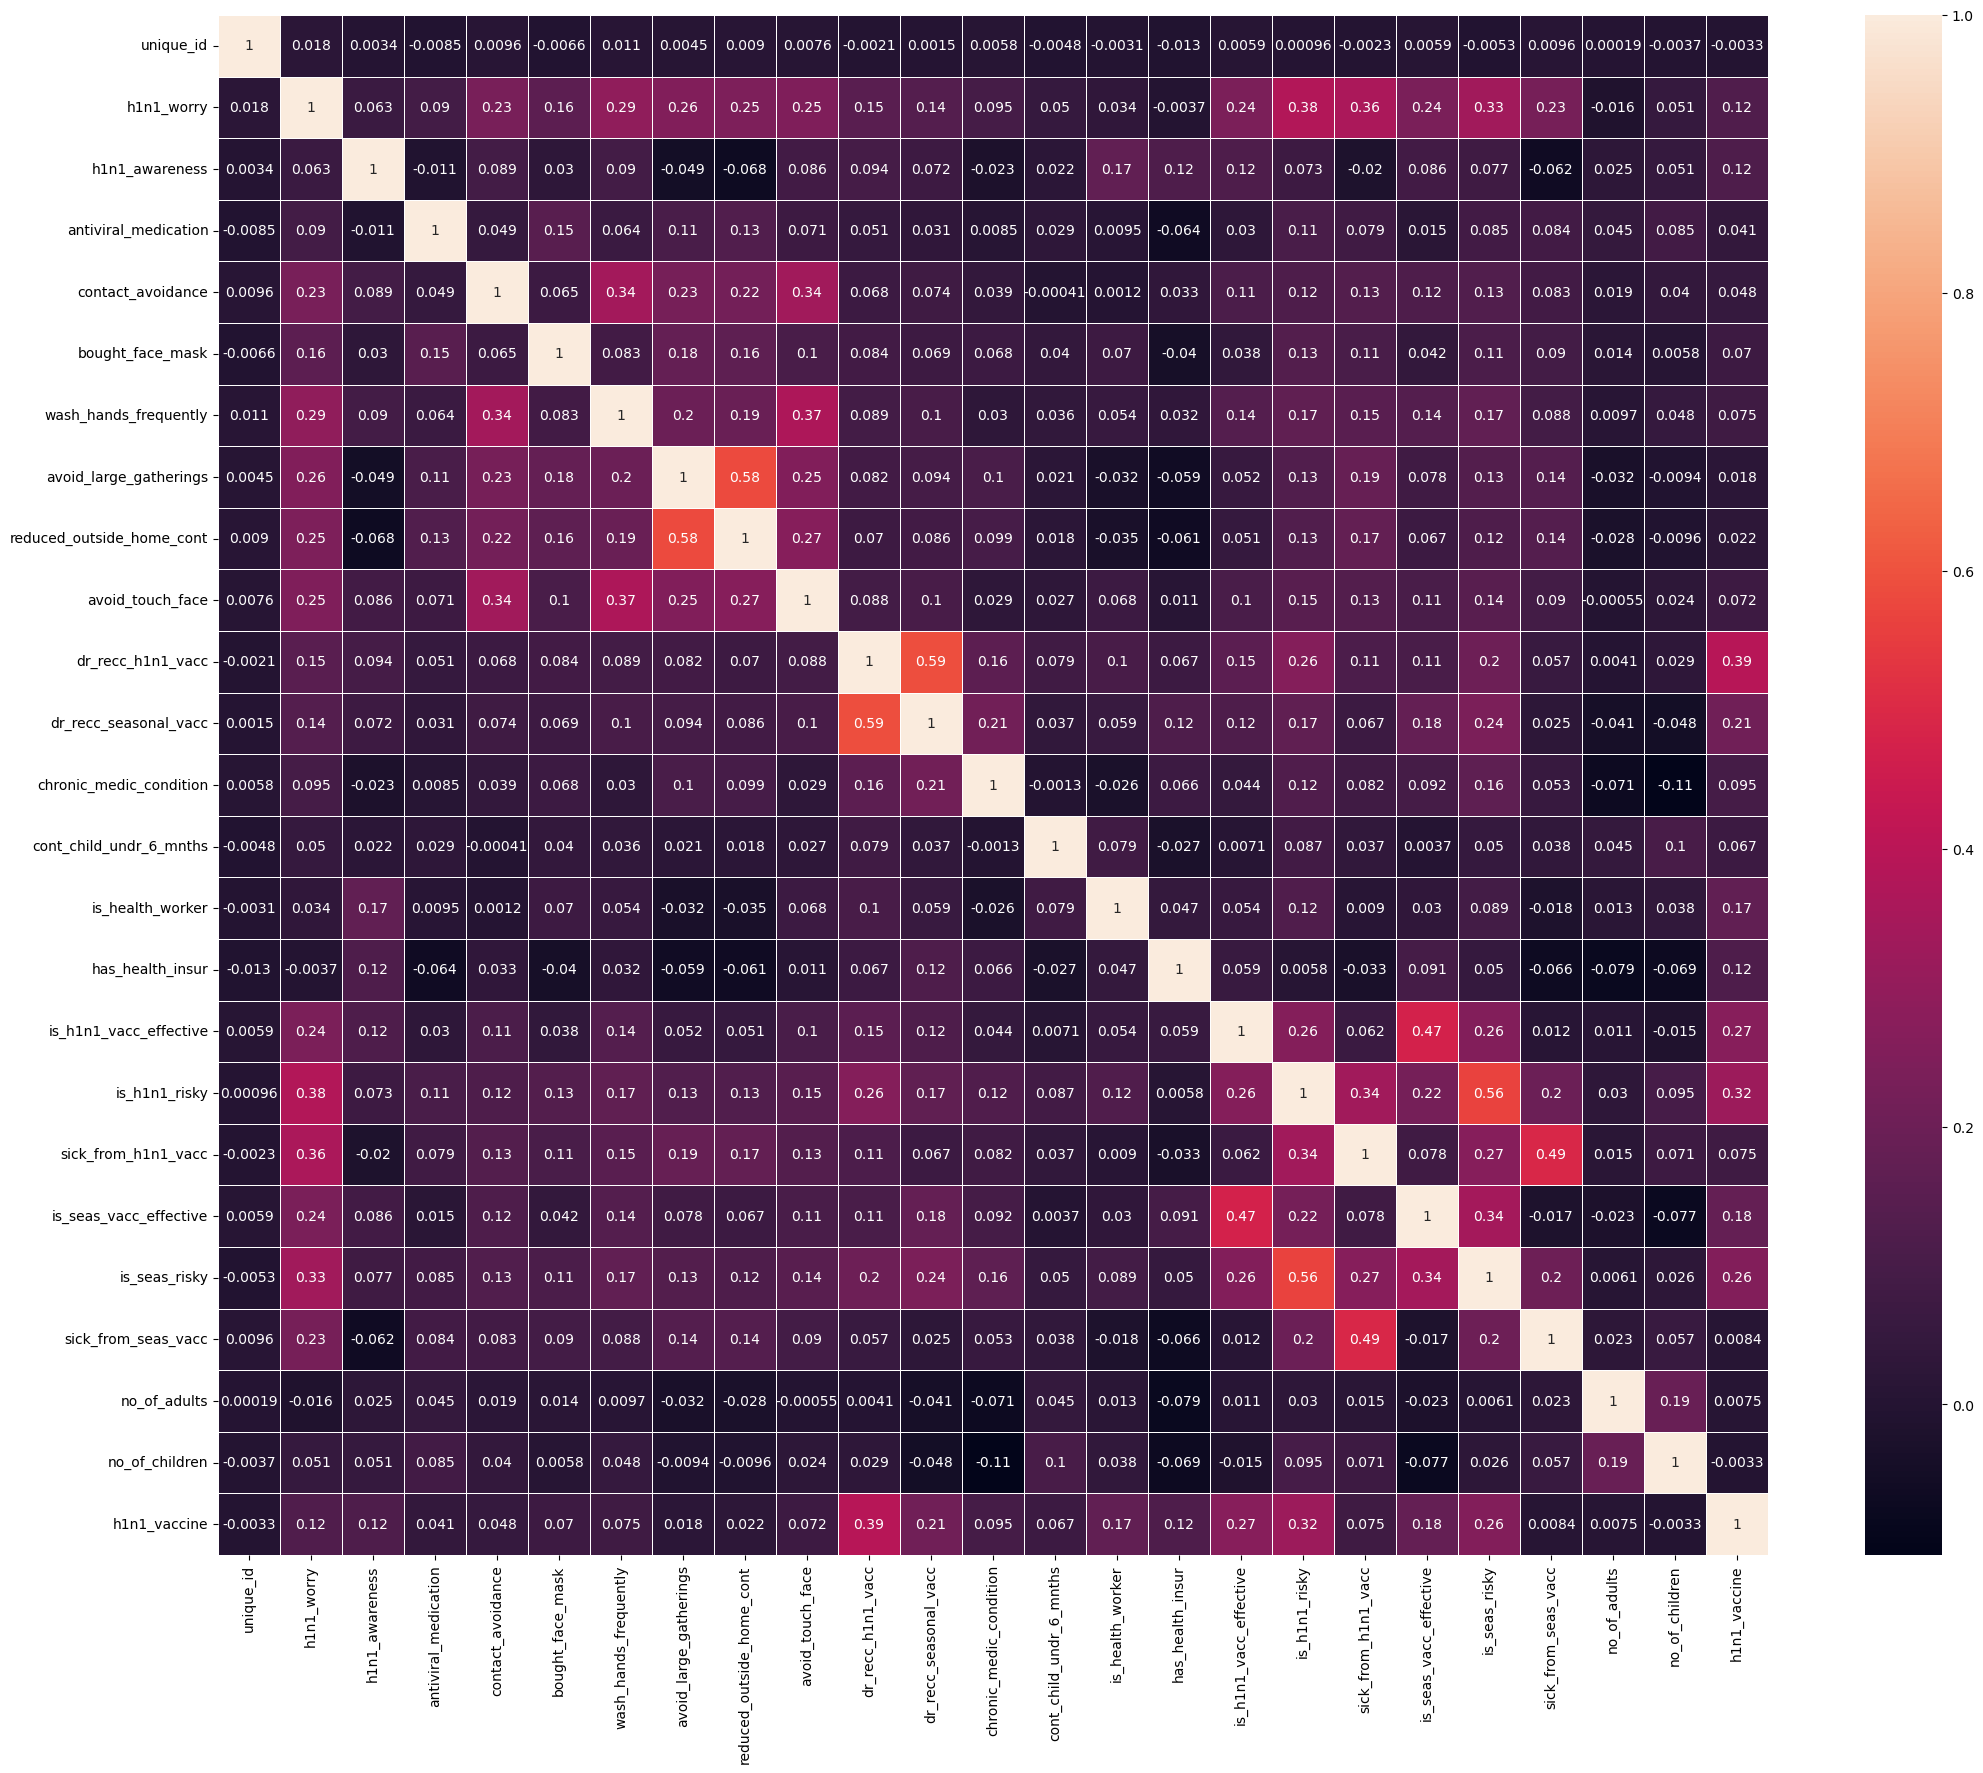

In [17]:
plt.figure(figsize=(25,20))
corr_mat=data.corr()
sns.heatmap(corr_mat,annot=True,linewidths=0.5)

In [18]:
sns.pairplot(data)
plt.show()

In [19]:
data.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [21]:
data.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

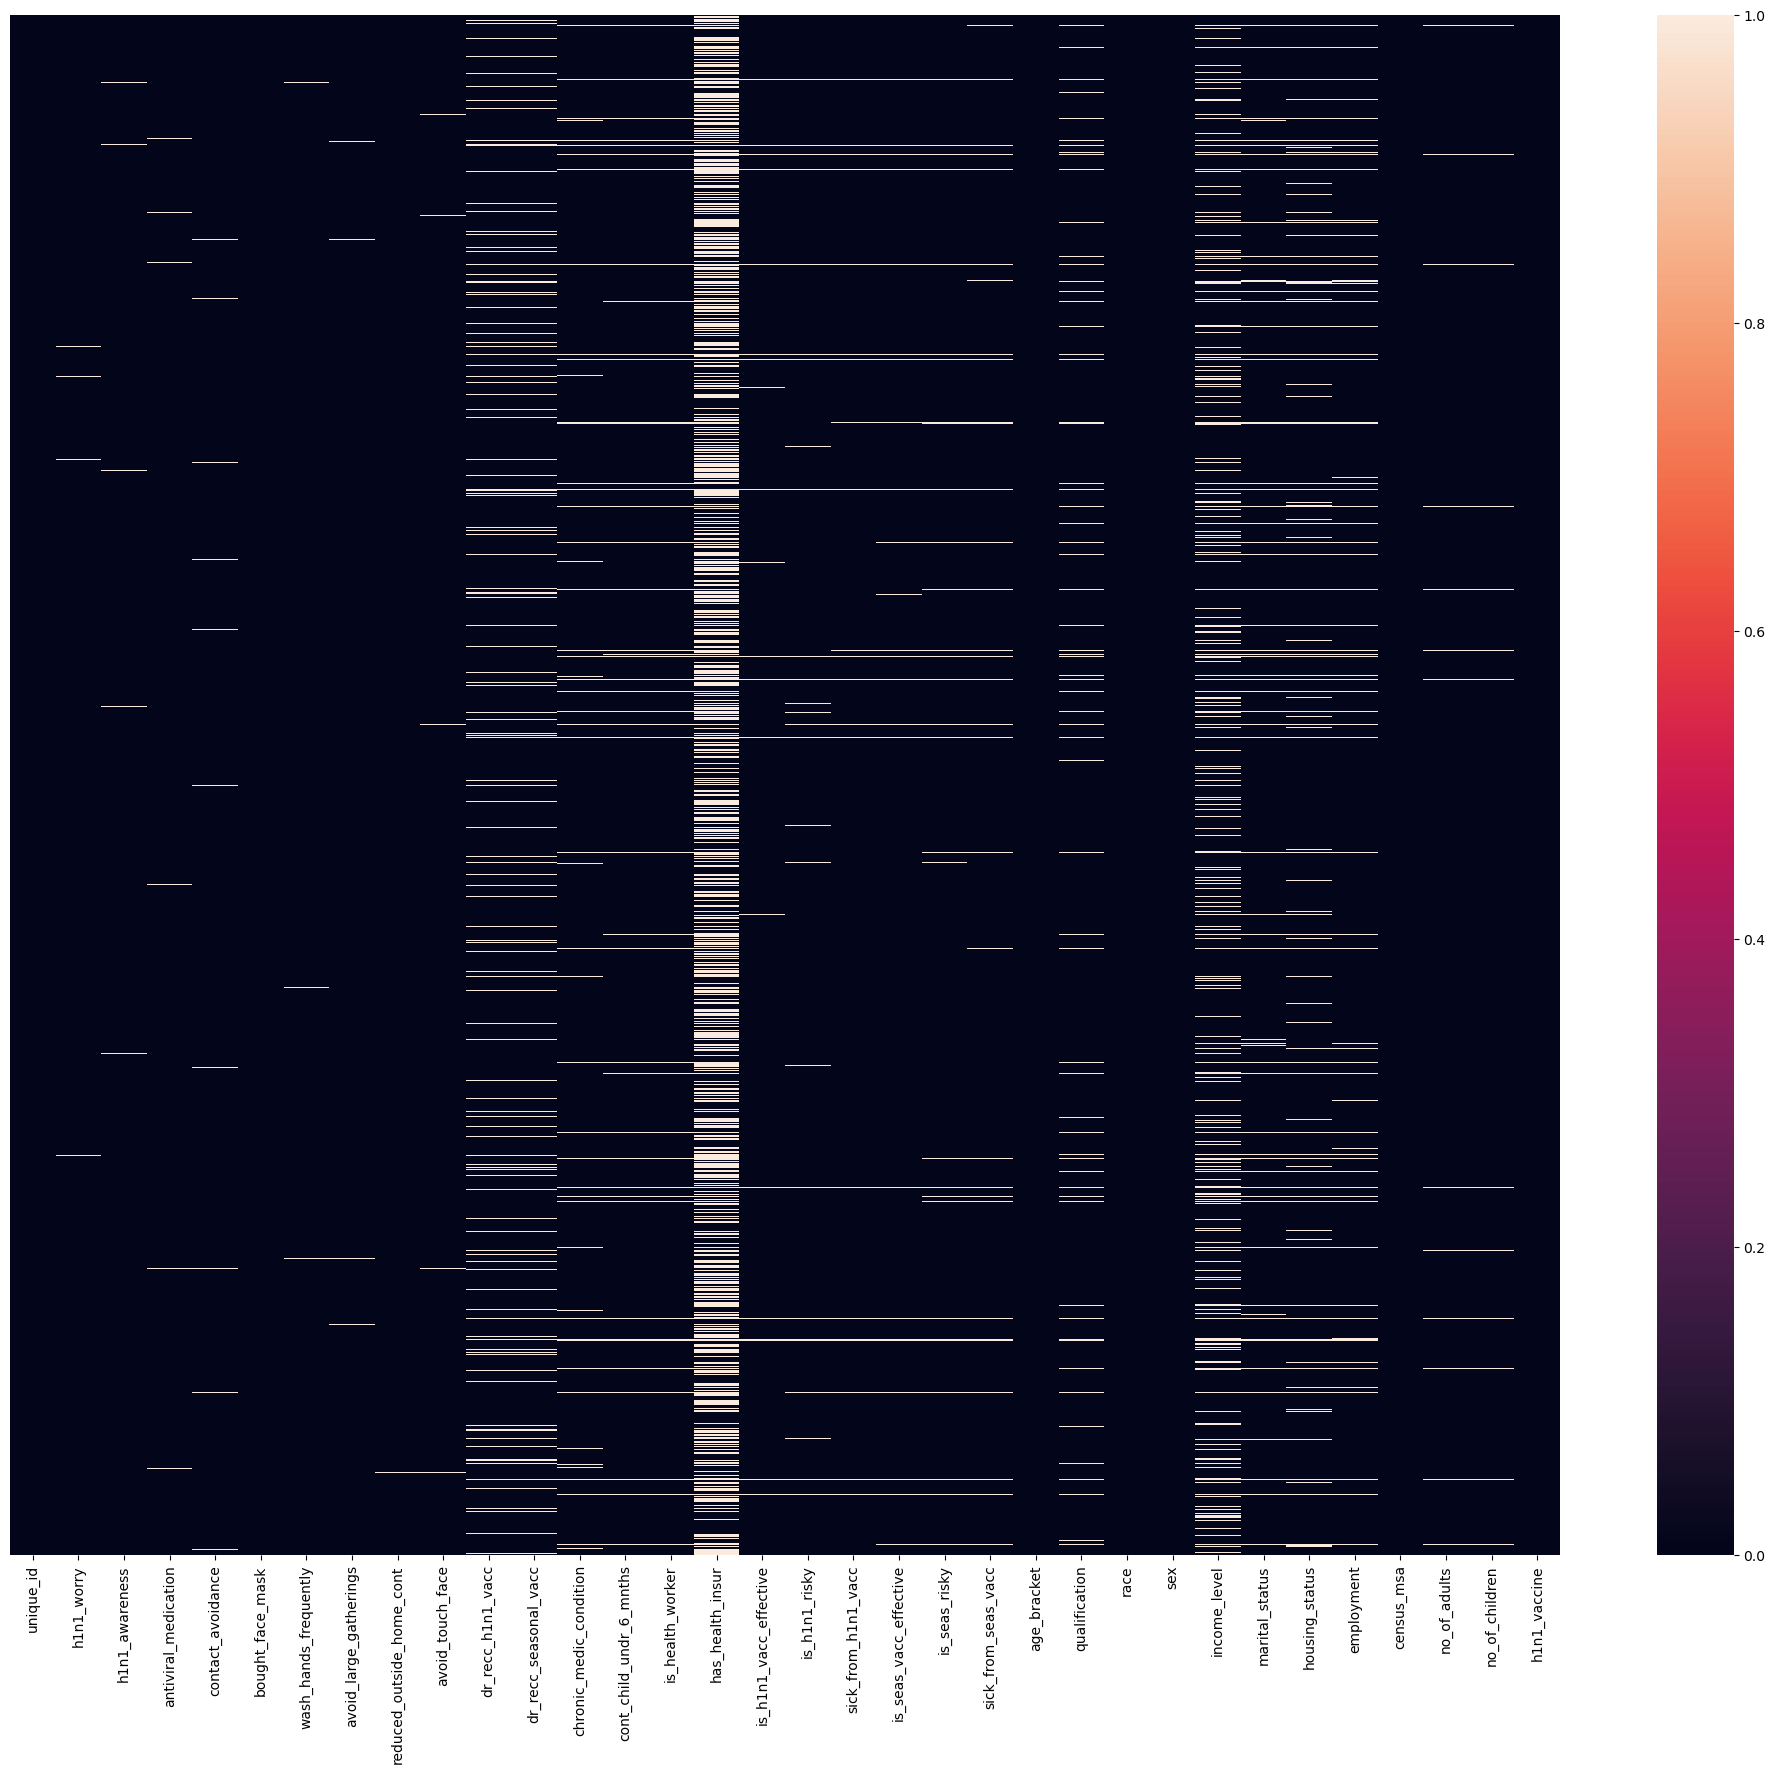

In [22]:
plt.figure(figsize=(25,20))
sns.heatmap(data.isnull(),yticklabels=False)

In [23]:
print(data["sex"].value_counts())
print(data["no_of_adults"].value_counts())
print(data["no_of_children"].value_counts())
print(data["race"].value_counts())
print(data["marital_status"].value_counts())
print(data["housing_status"].value_counts())
print(data["h1n1_vaccine"].value_counts())
print(data["qualification"].value_counts())

Female    15858
Male      10849
Name: sex, dtype: int64
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64
0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
Married        13555
Not Married    11744
Name: marital_status, dtype: int64
Own     18736
Rent     5929
Name: housing_status, dtype: int64
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64


In [24]:
data.fillna(data.median(), inplace=True)

In [25]:
data.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [26]:
data['qualification'].fillna(data['qualification'].mode()[0], inplace=True)
data['income_level'].fillna(data['income_level'].mode()[0], inplace=True)
data['marital_status'].fillna(data['marital_status'].mode()[0], inplace=True)
data['housing_status'].fillna(data['housing_status'].mode()[0], inplace=True)
data['employment'].fillna(data['employment'].mode()[0], inplace=True)

In [27]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [28]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [29]:
X = data.drop("h1n1_vaccine", axis=1)
y = data["h1n1_vaccine"]

label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=['object'])
X_categorical_encoded = X_categorical.apply(label_encoder.fit_transform)
X = pd.concat([X.drop(X_categorical.columns, axis=1), X_categorical_encoded], axis=1)

In [30]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = LogisticRegression(solver = "liblinear")
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
model.score(X_train,y_train)

0.8075824947343787

In [35]:
model.score(X_test,y_test)

0.8034444028453762

In [36]:
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
dtree.score(X_train,y_train)

1.0

In [38]:
dtree.score(X_test,y_test)

0.7519655559715462

In [39]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 20,random_state=0)
dTreeR.fit(X_train,y_train)
print(dTreeR.score(X_train,y_train))

0.9849286215773462


In [40]:
y_predict=dTreeR.predict(X_test)

In [41]:
print(dTreeR.score(X_test,y_test))

0.7609509546986147


In [42]:
from sklearn import metrics

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4212
           1       0.44      0.46      0.45      1130

    accuracy                           0.76      5342
   macro avg       0.65      0.65      0.65      5342
weighted avg       0.77      0.76      0.76      5342



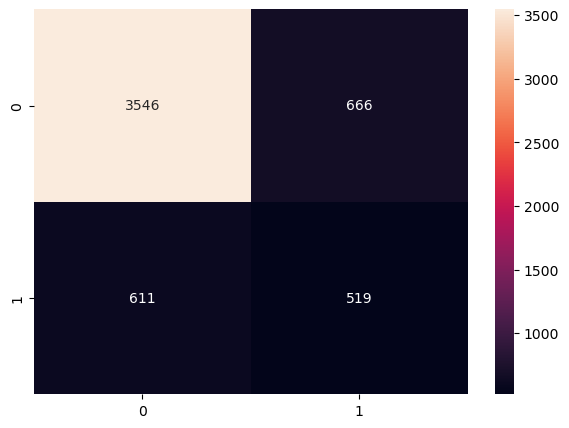

In [43]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in ["0","1"]],
                    columns=[i for i in ["0","1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
classification_rep = classification_report(y_test, y_predict)

print("Classification Report:\n", classification_rep)

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming dTreeR is your DecisionTreeClassifier
dTreeR = DecisionTreeClassifier()

bgcl = BaggingClassifier(n_estimators=140, base_estimator=dTreeR, random_state=0)
bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test, y_test))

0.8348932983901161


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4212
           1       0.66      0.44      0.53      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.69      0.72      5342
weighted avg       0.82      0.83      0.82      5342



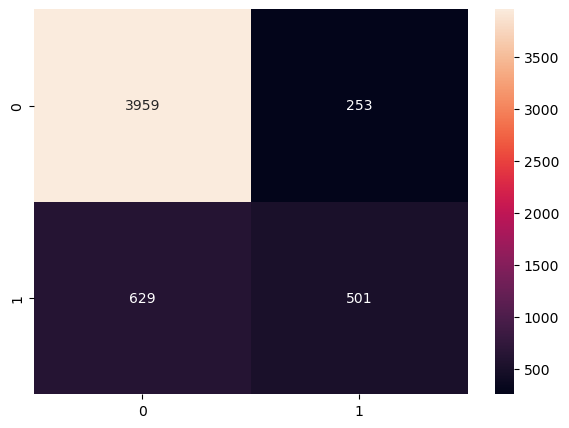

In [45]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in ["0","1"]],
                    columns=[i for i in ["0","1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
classification_rep = classification_report(y_test, y_predict)

print("Classification Report:\n", classification_rep)

In [46]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 200, random_state=0)
abc = abc.fit(X_train, y_train)
y_predict = abc.predict(X_test)
print(abc.score(X_test, y_test))

0.8388244103332085


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.42      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.71      5342
weighted avg       0.83      0.84      0.82      5342



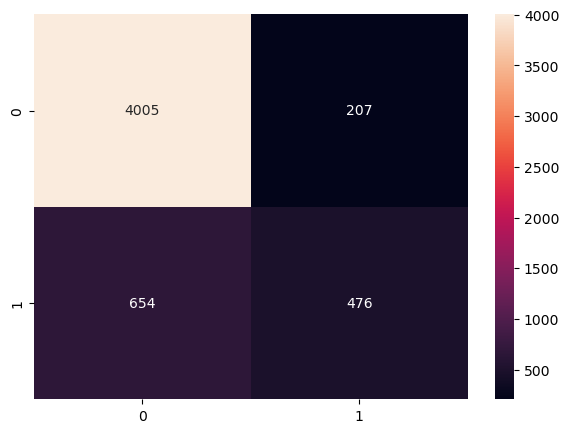

In [47]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in ["0","1"]],
                    columns=[i for i in ["0","1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
classification_rep = classification_report(y_test, y_predict)

print("Classification Report:\n", classification_rep)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 200, random_state=0)
gbc = gbc.fit(X_train, y_train)
y_predict = gbc.predict(X_test)
print(gbc.score(X_test, y_test))

0.8408835642081617


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.69      0.45      0.54      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.70      0.72      5342
weighted avg       0.83      0.84      0.83      5342



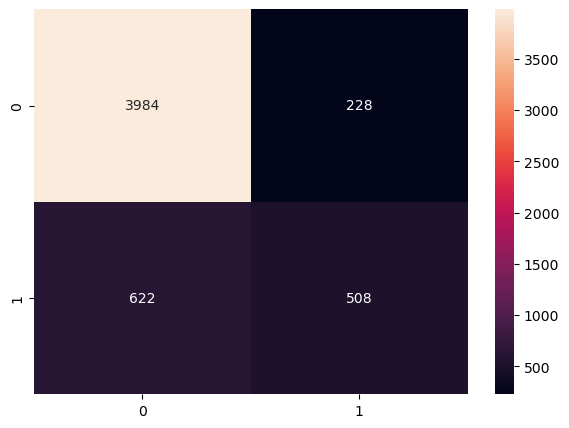

In [49]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in ["0","1"]],
                    columns=[i for i in ["0","1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
classification_rep = classification_report(y_test, y_predict)

print("Classification Report:\n", classification_rep)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=0,max_features=3)
rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

0.8320853612879071


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      4212
           1       0.76      0.30      0.43      1130

    accuracy                           0.83      5342
   macro avg       0.80      0.64      0.67      5342
weighted avg       0.82      0.83      0.80      5342



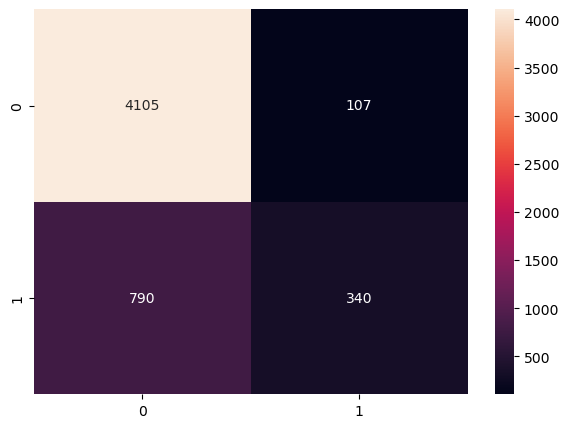

In [52]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in ["0","1"]],
                    columns=[i for i in ["0","1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
classification_rep = classification_report(y_test, y_predict)

print("Classification Report:\n", classification_rep)